# Project 2: Segmentation

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions below.

Please also fill in here the time that each part took you:
* 1. Setting up PyMaxFlow: <span style="color:red;">About 25 minutes</span>
* 2. Getting your first successful segmentation: <span style="color:red;">About 4 hours</span>
* 3. Adjusting parameters (e.g. $\lambda$, $\sigma$) and so forth, to get good results: <span style="color:red;">About 2 hours</span>
* 4. Completing the write-up: <span style="color:red;">About 20 minutes</span>

Note that there are two folders within the project.  We have provided some images for you to use in testing your implementation, in the `provided images` folder along with their ground-truth segmentations to compare your results to.  Along with these, we want you to provide 2-4 additional images that you select on which you show your results.  <i>Please use the `provided_images` in that path and place any others in the `user_data` folder, and load all of the images (or user input point location files) via the approapriate relative path.  We will drop your notebook file and your `user_data` folder into our folder (which will have the `provided_images` already) and then run your notebook.</i>




## Preparation:
So that you can focus on the elements of the cost function ( the link weights), you may use a existing implementation of the actual min-cut algorithm itself.  You set up the graph, but it will take care of finding the minimum cut.

For this assignment we will be using a python library called PyMaxFlow.  This library is a python wrapper around the original C++ implementation of the min-cut code from [Vladimir Kolmogorov](http://pub.ist.ac.at/%7Evnk/software.html) (who has co-authored several papers on this subject).    

Note: For windows users, you will need the Visual C++ compiler in order for PyMaxFlow to work.  If you already have Visual Studio, this shouldn't be a problem but if you just want the compiler without Visual Studio, you can download [Build Tools For Visual Studio 2017](https://visualstudio.microsoft.com/downloads/#build-tools-for-visual-studio-2017). Once you have access to the Visual C++ compiler look at the next paragraph for PyMaxFlow installation.

PyMaxFlow requires Cython, which should come standard in your anaconda environment but the command to install that will also be included.  To install PyMaxFlow enter the following commands replacing "YourEnvironmentName" with the name of your anaconda environment.
~~~
conda activate YourEnvironemntName
conda install cython
pip install pymaxflow
~~~
Once PyMaxFlow is installed, to understand how to use the library, there is a great [tutorial page](http://pmneila.github.io/PyMaxflow/tutorial.html) that shows how to get started with some simple examples.  Do the "first example" and perhaps the "binary image restoration" as well.

In [1]:
import maxflow

In [2]:
# Create a graph with integer capacities, with 2 non-terminal nodes and 2 non-terminal edges.
# Note that these numbers are just indicative (read below)
g = maxflow.Graph[int](2, 2)

# Add two (non-terminal) nodes. Get the index to the first one.
nodes = g.add_nodes(2)

# Create the non-terminal edges (forwards and backwards) with the given capacities between nodes 0 and 1.
g.add_edge(nodes[0], nodes[1], 1, 2)

# Set the capacities of the terminal edges...
# ...for the first node
g.add_tedge(nodes[0], 2, 5)

# ...for the second node
g.add_tedge(nodes[1], 9, 4)

In [3]:
flow = g.maxflow()
print(f"Maximum flow: {flow}")

Maximum flow: 8


In [4]:
print(f"Segment of the node 0: {g.get_segment(nodes[0])}")
print(f"Segment of the node 1: {g.get_segment(nodes[1])}")

Segment of the node 0: 1
Segment of the node 1: 0




## Annotations:
Graph cut segmentation is an interactive algorithm requiring the user to provide foreground and background seeds.  Provided is a python file that will open a gui and allow you to annotate the image.  This gui is optional and will require additional packages to be installed into your environment.  To install the packages open a terminal and enter the following commands:
~~~
conda activate YourEnvironmentName
conda install scikit-image pillow
~~~
You can use the gui in the following way:
```python
import guiseg
fore, back = guiseg.get_fore_back(image)
image[fore]  # the foreground seeds
image[back]  # the background seeds
```

For the `guiseg` routine to run, I also found it necssary to install PIL ImageTk (For me, it was `sudo apt install python3-pil.imagetk` but it will be different for Conda).

In [5]:
import cv2

In [6]:
# THIS CELL IS COMMENTED OUT BECAUSE THE GRADERS SHOULDN'T NEED TO USE IT - IT'S THE GUI CODE 
# WE WERE GIVEN IN ORDER TO PICK BACKGROUND AND FOREGROUND SEEDS

# import guiseg

# # imageBGR = cv2.imread('provided_images/banana.png')
# # imageBGR = cv2.imread('provided_images/llama.jpg')
# # imageBGR = cv2.imread('provided_images/penguin.png')
# # imageBGR = cv2.imread('provided_images/simplecircle.png')
# # imageBGR = cv2.imread('provided_images/teddy.png')
# # imageBGR = cv2.imread('user_data/fox.jpg')
# imageBGR = cv2.imread('user_data/alligator.jpg')
# image = imageBGR[:,:,::-1]; # I reverse the BGR from OpenCV to BGR

# # When the GUI pops up, you can pick either the "Foreground" or "Background" buttons to
# # select pixels to be respective seeds.  Once you're finished, click "Return"
# fore, back = guiseg.get_fore_back(image)
# print(image[fore][:5])  # foreground seeds (RGB values for all pixels drawn on, but only showing 5)
# print(image[back][:5])  # background seeds (RGB values for all pixels drawn on, but only showing 5)

In [7]:
import json
import numpy as np

In [8]:
# THIS CELL IS COMMENTED OUT BECAUSE THE GRADERS SHOULDN'T NEED TO USE IT - IT'S THE JSON DUMP 
# CODE I USED TO SAVE THE FOREGROUND AND BACKGROUND SEEDS FOR EACH IMAGE

# with open('./user_data/banana_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/banana_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)

# with open('./user_data/llama_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/llama_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)

# with open('./user_data/penguin_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/penguin_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)

# with open('./user_data/simplecircle_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/simplecircle_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)

# with open('./user_data/teddy_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/teddy_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)

# with open('./user_data/fox_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/fox_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)

# with open('./user_data/alligator_foreground.json', 'w') as fp:
#     json.dump(np.array(fore).tolist(), fp)

# with open('./user_data/alligator_background.json', 'w') as fp:
#     json.dump(np.array(back).tolist(), fp)



## Graph Cut:
Your code should read in an image and a set of seed pixels and use graph-cut segmentation to segment the image.

You will need to calculate the costs for the t-links (region terms) and the n-links (boundary terms). See the book, the notes/slides, or published papers in this area for ideas of how to define these.  Remember that the t-link weights to a particular terminal (foreground or background) should be large if that pixel looks a lot like the respective foreground/background seeds. The n-link weights should be large if the two neighboring pixels are similar.

Here is [the original paper on graph-cut segmentation](http://www.csd.uwo.ca/~yuri/Papers/iccv01.pdf), which might help with some ideas, but you should look at the literature to see what other costs functions / link weights others have used.

Once the graph is built, use the min-cut algorithm to partition the graph into nodes connected to the foreground node or to the background node, then use these as the resulting labels for the segmentation. Display this result graphically in some fashion overlaid on the input image.  It is best to start with simple images whose foreground and background colors are pretty different and for ones where the edges are pretty clear.  Graph-cut segmentation struggles sometimes with long, thin structures, so you should avoid these types of images early on.



In [9]:
from sklearn.neighbors import KernelDensity
import maxflow
import matplotlib.pyplot as plt
from copy import deepcopy

In [10]:
# Graphing/display code - copied over from the first learning lab
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2

def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': plt.rcParams['axes.titlesize'],
                                 'fontweight' : plt.rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])

In [11]:
# Implementation here (feel free to add additional cells of course)
def create_graph(img, foreground_pixels, background_pixels, sigma=0.01):
    print('Creating graph...')

    # Fit a sklearn KDE on the seeded foreground and background pixels - the kernel and bandwith params
    # are from the example that sklearn has on their websit - I got some good results without messing
    # with them so I didn't make any changes
    foreground_kernel = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(foreground_pixels)
    background_kernel = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(background_pixels)

    # Grab the number of rows and columns in the image - will make iterating, reshaping, etc. easier
    n, m = img.shape[0], img.shape[1]

    # Create pymaxflow graph with a node for each pixel (num pixels = n * m)
    g = maxflow.Graph[float](n, m)
    nodes = g.add_nodes(n * m)

    # I found it a lot easier to just work with a flattened image since "nodes" is basically a 1-D list
    flattened_image = img.reshape(-1, 3)

    # In order to more easily deal with rows and columns, we're basically just iterating through the flattened image
    for i in range(n * m):
        # Grab the current pixel and make sure it's a 1-D array (for sklearn's KDE functionality)
        x = flattened_image[i].reshape(1, -1)

        # Grab the NEGATIVE log likelihoods from the foreground and background kernels
        foreground_likelihood = -foreground_kernel.score_samples(x)[0]
        background_likelihood = -background_kernel.score_samples(x)[0]

        # Add terminal edges to the pixel node
        g.add_tedge(i, foreground_likelihood, background_likelihood)

        # Create an edge between any neighbor pixels (up, down, left, and right) -> use the Gaussian equation
        # found in the lecture slides that Dr. Farrell pointed out to us -> had to think through a lot about
        # the logic for the if-statements, plus I found some good stuff online to double-check everything,
        # but essentially it simply checks where we're at in the iteration (it's a little more complicated 
        # since we're iterating through the flattened image instead of the image itself)
        if i % m != 0:
            weight = np.exp(-(np.linalg.norm(flattened_image[i] - flattened_image[i - 1])) / sigma)
            g.add_edge(nodes[i], nodes[i - 1], weight, weight)

        if (i + 1) % m != 0:
            weight = np.exp(-(np.linalg.norm(flattened_image[i] - flattened_image[i + 1])) / sigma)
            g.add_edge(nodes[i], nodes[i + 1], weight, weight)

        if i // m != 0:
            weight = np.exp(-(np.linalg.norm(flattened_image[i] - flattened_image[i - m])) / sigma)
            g.add_edge(nodes[i], nodes[i - m], weight, weight)

        if i // m != n - 1:
            weight = np.exp(-(np.linalg.norm(flattened_image[i] - flattened_image[i + m])) / sigma)
            g.add_edge(nodes[i], nodes[i + m], weight, weight)

    print('Computing cut...')

    # Calculate the graph cut
    g.maxflow()

    # Create flattened output image -> default to ones instead of zeroes because pymaxflow uses zeroes to denote 
    # source pixels
    output_image = np.ones(shape=nodes.shape)
    
    # Grab the value (0 or 1) calculated by pymaxflow
    for i in range(n * m):
        output_image[i] = g.get_segment(nodes[i])

    print('Done')

    # Return the output image, but reshape it back to the original image shape
    return output_image.reshape(n, m)

In [12]:
# Helper function for displaying the results requested in the rubric
def show_results(image, segment_image, ground_truth_image_path=None):
    # Colors for marking everything
    white_color = np.array([255, 255, 255], dtype='uint8')
    black_color = np.array([0, 0, 0], dtype='uint8')
    gray_color = np.array([128, 128, 128], dtype='uint8')

    # Create the seed image (default everything to gray and then draw the white/black seeds)
    seed_image = deepcopy(image)
    seed_image[:,:] = gray_color
    seed_image[fore] = white_color
    seed_image[back] = black_color

    # Create the final, segmented image -> the calculated segment is displayed in white and 
    # everything else is in black
    final_image = deepcopy(image)
    segment_indices = np.where(segment_image == 1)
    non_segment_indices = np.where(segment_image == 0)
    final_image[segment_indices] = white_color
    final_image[non_segment_indices] = black_color

    # By default we don't have a ground truth image
    if ground_truth_image_path is None:
        plt.subplot(131)
        plt.imshow(image)
        just_title('Original Image')

        plt.subplot(132)
        plt.imshow(seed_image)
        just_title('Seeds')

        plt.subplot(133)
        plt.imshow(final_image)
        just_title('Segment')

    # If we do have a ground truth image, load it in and display it with everything else
    else:
        ground_truth_image = cv2.imread(ground_truth_image_path)[:,:,::-1]
        plt.subplot(231)
        plt.imshow(image)
        just_title('Original Image')

        plt.subplot(232)
        plt.imshow(seed_image)
        just_title('Seeds')

        plt.subplot(233)
        plt.imshow(final_image)
        just_title('Segment')

        plt.subplot(236)
        plt.imshow(ground_truth_image)
        just_title('Ground Truth')

### Provided Images

In [13]:
# Generate results here (again, add additional cells to your heart's content)

# BANANA
imageBGR = cv2.imread('./provided_images/banana.png')
image = imageBGR[:,:,::-1]

with open('./user_data/banana_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/banana_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


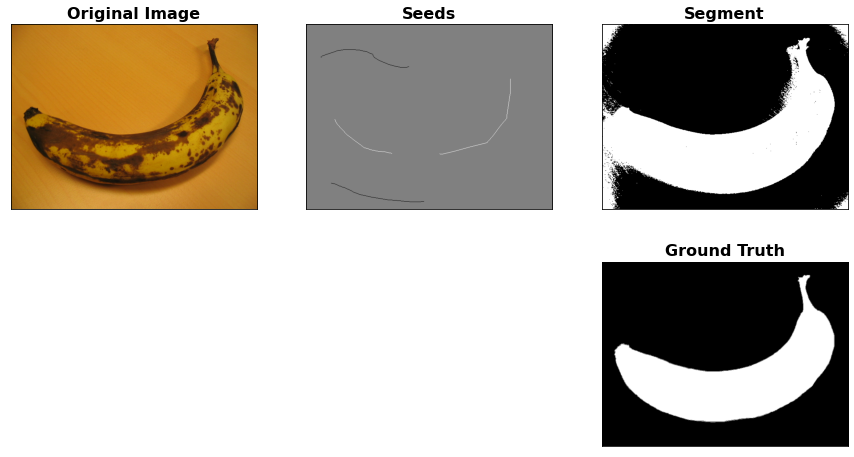

In [14]:
show_results(image, segment_image, ground_truth_image_path='./provided_images/ground_truth/banana-seg.png')

In [15]:
# LLAMA
imageBGR = cv2.imread('./provided_images/llama.jpg')
image = imageBGR[:,:,::-1]

with open('./user_data/llama_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/llama_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


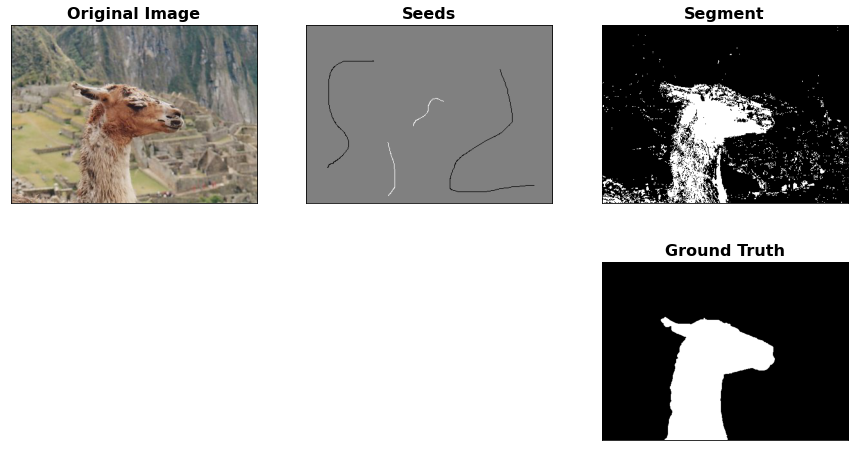

In [16]:
show_results(image, segment_image, ground_truth_image_path='./provided_images/ground_truth/llama-seg.png')

In [17]:
# PENGUIN
imageBGR = cv2.imread('./provided_images/penguin.png')
image = imageBGR[:,:,::-1]

with open('./user_data/penguin_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/penguin_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


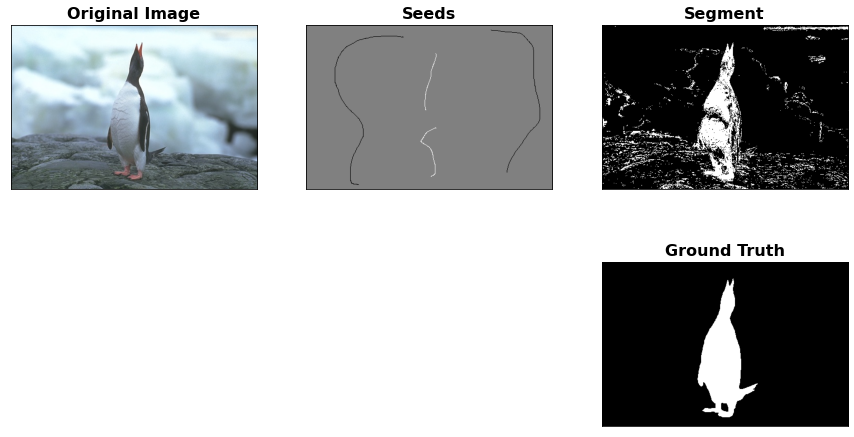

In [18]:
show_results(image, segment_image, ground_truth_image_path='./provided_images/ground_truth/penguin-seg.png')

In [19]:
# SIMPLE CIRCLE
imageBGR = cv2.imread('./provided_images/simplecircle.png')
image = imageBGR[:,:,::-1]

with open('./user_data/simplecircle_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/simplecircle_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


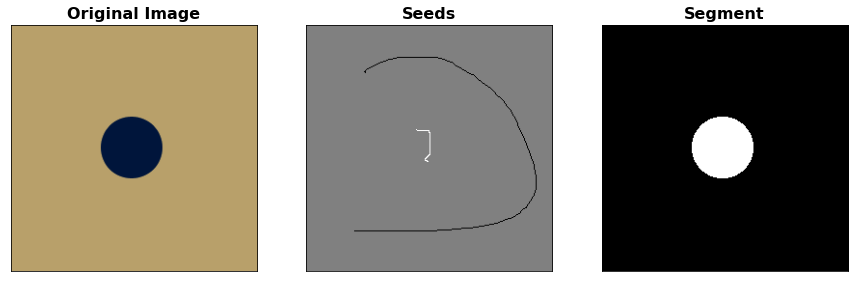

In [20]:
show_results(image, segment_image)

In [21]:
# TEDDY
imageBGR = cv2.imread('./provided_images/teddy.png')
image = imageBGR[:,:,::-1]

with open('./user_data/teddy_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/teddy_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


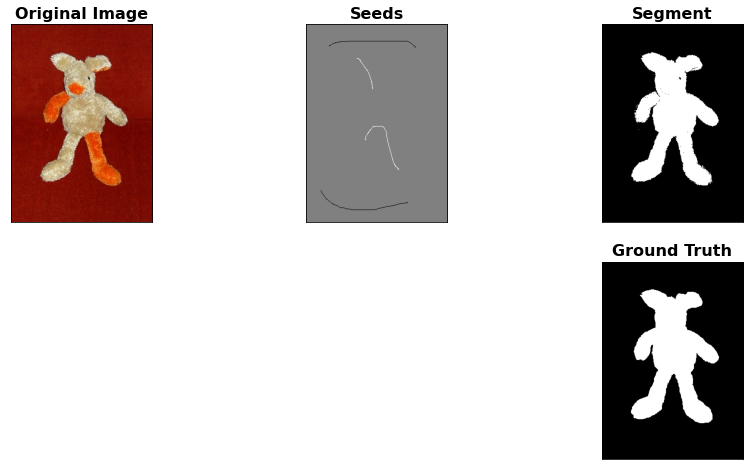

In [22]:
show_results(image, segment_image, ground_truth_image_path='./provided_images/ground_truth/teddy-seg.png')

### Images I Selected

##### I picked two images, one that is relatively easy and one that is relatively challenging.  The "easy" image contains a brown/orange fox in the middle of a green field.  I thought this one was fairly easy because there seems to be a decent amount of contrast between the fox and the background.  The more challenging image is that of an alligator poking its head out of some swamp water.  I feel like this image is much more difficult because the color of the alligator is very similar to the brown, dirty water and the chunks of moss/debris in the water.  You can see that, like most of the provided images, the results for both images aren't perfect but are still compelling.

In [23]:
# FOX - relatively easy
imageBGR = cv2.imread('./user_data/fox.jpg')
image = imageBGR[:,:,::-1]

with open('./user_data/fox_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/fox_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


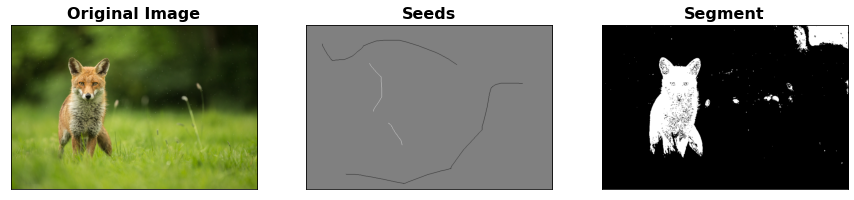

In [24]:
show_results(image, segment_image)

In [25]:
# ALLIGATOR - difficult
imageBGR = cv2.imread('./user_data/alligator.jpg')
image = imageBGR[:,:,::-1]

with open('./user_data/alligator_foreground.json', 'r') as fp:
    arry = np.array(json.load(fp))
    fore = arry[0], arry[1]

with open('./user_data/alligator_background.json', 'r') as fp:
    arry = np.array(json.load(fp))
    back = arry[0], arry[1]

segment_image = create_graph(image, image[fore], image[back])

Creating graph...
Computing cut...
Done


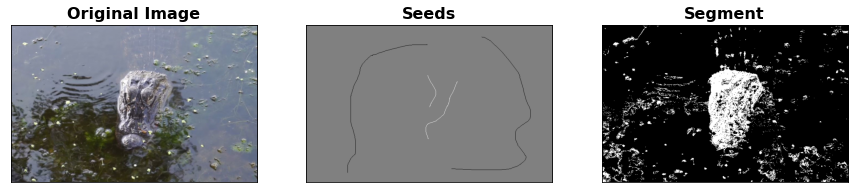

In [26]:
show_results(image, segment_image)


## Grading / Rubric
Points for this assigment will be assigned as follows (100 points total):
* [20 pts] Code that correctly generates the graph network structure (nodes, n-links, t-links).
* [10 pts] Code that produces the boundary term $B(p,q)$ used for n-links.
* [10 pts] Code that produces the region term of the cost $R(p,A)$ used for the t-links.  Remember that you have t-links per pixel, one with cost determined by matching $p$ with the foreground appearance distribution, the other determined relative to the background distribution.  You may use the [sk-learn implementation](https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation) of Kernel Density Estimation.  However you will receive 10 extra points if you implement it yourself.
* [20 pts] Implementing the graph-cut with `pymaxflow` and finding the optimal solution for the input graph.
* [10 pts] Displaying Results in the following format (for each input image you'll show the following 3-4 result images):
   1. Original Image.
   2. Tri-map of what was selected by the user (white for foreground, black for background, gray for unknown).  This can be overlaid on top of a faint copy of the image for context if desired.
   3. Final segmentation.  Again you can overlay it on a faint copy of the original for context.
   4. On the <i>provided images</i> please show a comparison of your resulting segmentaiton with the ground truth.
* [20 pts] Good (certainly not perfect, some of them are challenging, but decent/reasonable) results on the 4 provided images (banana, llama, penguin, teddy).  Each image will receive up to 5 points.
* [10 pts] Demonstrating your algorithm on 2-4 additional images.  At least one of the images should be somewhat easy, one should be somewhat challenging -- expalin why you think they're respectively easy/challenging.


## Write-up:
Provide an explanation for the following items:
* Describe how you determinied/computed the n-link and t-link weights.
* What kinds of image does graph cut segmentation work well for? What kinds of images do you find it struggles with?
* What did you learn from the project?
* What if any suggestions do you have for improving it (for future students)?

<span style="color:red;">WRITE-UP HERE</span>

* Describe how you determinied/computed the n-link and t-link weights: For the n-link weights I used the forumla that Dr. Farrell pointed out to us in class (found in the lecture slides).  The weight is equal to e ^ (-norm(pixel_1 - pixel_2) / (2 * sigma_squared)).  For the t-link weights I first used sklearn's Kernel Density Estimate class to fit two separate density estimate models, one for the seeded foreground pixels and one for the seeded background pixels.  I then passed each pixel through those fitted models in order to obtain the negative log likelihood values of the pixel being a foreground or background pixel, and used those likelihood values as the weights.
* What kinds of image does graph cut segmentation work well for? What kinds of images do you find it struggles with?: It seems like it works really well when the objects you are trying to segment are clearly distinguishable from the rest of the image.  For example, the "simple circle" and "teddy" pictures contained foreground objects that were significantly different from the remainder of the image, so graph cut segmentation was able to produce great results.  For most of the other pictures though, the foreground subjects contained pixels that were similar to many of the background pixels, like the "banana", "penguin", "llama", "alligator", and "fox" iamges; this caused the graph cut algorithm to find some "foreground" pixels that were not really part of the foreground (though for all of the mentioned images the results were still decent).
* What did you learn from the project?: I learned about kernel density estimates, graph cuts (we briefly talked about these in CS 312 but I didn't remember them very well), and segmentation.
* What if any suggestions do you have for improving it (for future students)?: I would put all of the instructions towards the top/beginning of the notebook; I found that I was confused about a few things until I read the rubric section.  For example, the rubric talks about sklearn's Kernel Density Estimate functionality, which is the only place where that is discussed.

For the explanation/discussion about the images I selected, please see the markdown cell I created at the start of that section.